## Chapter 16: Elements of linear algebra

# C.2 Vectors and Vector Operations

In this Section we review the concept of a elementary arithmetic performed with vectors, sometimes referred to as 'arrays'.  

In [ ]:
# This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import numpy as np
import matplotlib.pyplot as plt
from mlrefined_libraries import linear_algebra_library as linlib

%load_ext autoreload
%autoreload 2

##  Vectors and vector operations

### Row and column vectors, dimensions

A *vector* is another word for *a listing of numbers*.  For example the following

$$
[2.1, \, \, -5.7, \, \, 13]
$$

is a vector of three elements, also referred to as a vector of length three or a vector of dimension $1\times3$.  The '1' in the first position tells us that this is a row vector, while the '3' says how many elements the vector has.  In general a vector can be of arbitrary length, and can contain numbers, variables, or both.  For example

$$
[x_1, \,\, x_2, \,\, x_3, \,\, x_4]
$$

is a vector of four variables, of dimension $1\times4$.

When listing the numbers / variables out horizontally we call the vector a *row vector*.  Of course we can also list them just as well vertically, e.g., we could write the first example above as a column

\begin{bmatrix}
2.1  \\
-5.7 \\
13 \\
\end{bmatrix}

in which case we refer to this as a *column vector* of length three or a vector of dimension $3\times 1$.  Notice that the row version of this had dimension $1\times 3$.  Here the '1' in the second entry tells us that the vector is a column.   

### Transposing vectors

We can swap back and forth between a row and column version of a vector by *transposing* it.  This is an operation performed on a single vector, and simply turns a row vector into an equivalent column vector and vice-versa.  This operation is denoted by a *superscript T* placed just to the right and above a vector.  For example we can transpose a column into a row vector like this

$$
{\begin{bmatrix}
2.1  \\
-5.7 \\
13 \\
\end{bmatrix}}^{\,T}
= [2.1, \, \, -5.7, \, \, 13]
$$

and likewise a row into a column vector like this 

$$
[2.1, \, \, -5.7, \, \, 13]^{\,T} = 
{\begin{bmatrix}
2.1  \\
-5.7 \\
13 \\
\end{bmatrix}}
$$

### Vector notation

To discuss vectors more generally we use algebraic notation, typically a *bold lowercase (often English) letter*.  This notation does not denote whether or not the vector is a row or column, or how many elements it contains: such information must be given explicitly.  For example we can denote a vector of numbers

$$
\mathbf{x} = [2.1, \, \, -5.7, \, \, 13]
$$

Here the fact that $\mathbf{x}$ represents a row vector with three elements is clear from its definition.  Thus when we say $\mathbf{x}^T$ it is clear from its definition that

$$
\mathbf{x} = {\begin{bmatrix}
2.1  \\
-5.7 \\
13 \\
\end{bmatrix}}
$$

We could also define $\mathbf{x}$ to be the vector of variables like

$$
\mathbf{x} = 
{\begin{bmatrix}
x_1  \\
x_2 \\
x_3 \\
x_4 \\
\end{bmatrix}}
$$

Again nothing about the notation $\mathbf{x}$ itself tells us whether or not it is a row or column vector, nor how many elements it contains.  This information is given explicitly when we define what the notation means here. 

### The geometric interpretation of vectors

Vectors are often interpreted geometrically, and can be drawn when in two or three dimensions.  A single vector is usually drawn as either a point or an arrow stemming from the origin.  In the next cell we illustrate both.  The 'point' version is in the left panel, with the 'arrow' version being in the right.  In both cases we simply plot each coordinate of the vector as a coordinate in the Cartesian plane.  Regardless of whether a vector is a column or row it is drawn the same.

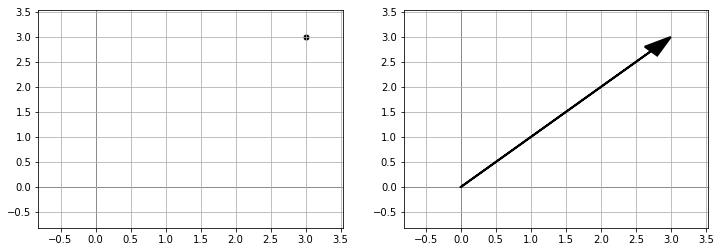

In [2]:
# This code cell will not be shown in the HTML version of this notebook
# import numpy, define a vectors
import numpy as np
vec1 = np.asarray([3,3])
plotter = linlib.vector_plots.single_plot(vec1)

### Defining a vector in numpy, transpose operation

Vectors are referred to more generally as 'arrays', which is the nomenclature used to constructs a vector in numpy as shown in the following cell.

In [3]:
# import statement for numpy
import numpy as np   

# construct a vector (a.k.a. an array), and print it out
x = np.asarray([2.1,-5.7,13])
print (x)

[  2.1  -5.7  13. ]


By default a numpy array is initialized in this way is *dimensionless* - technically speaking neither a row nor a column vector - which you can see by printing its 'shape' which is numpy-speak for dimensions.

In [4]:
# print out the vector's initial shape (or dimensions)
print (np.shape(x))

(3,)


Thus we must explicitly define whether $\mathbf{x}$ is a row or column vector.  We can do this by re-defining its shape as shown in the next cell.

In [5]:
# reshape x to be a row vector and print
x.shape = (1,3) 
print ('----- x as a row vector ----')
print (x)

# reshape x to be a column vector and print
x.shape = (3,1)
print ('----- x as a column vector ----')
print (x)

----- x as a row vector ----
[[  2.1  -5.7  13. ]]
----- x as a column vector ----
[[  2.1]
 [ -5.7]
 [ 13. ]]


The notation for transposing a vector in numpy looks like

                <numpy_array>.T
                
We illustrate on $\mathbf{x}$ in the next cell.  Notice that we last set $\mathbf{x}$ to be a column vector prior to activating the cell below.

In [6]:
print ('----- the original vector - a column -----')
print (x)
print ('----- the transpose - now a row vector ----- ')
print (x.T)

----- the original vector - a column -----
[[  2.1]
 [ -5.7]
 [ 13. ]]
----- the transpose - now a row vector ----- 
[[  2.1  -5.7  13. ]]


##  Adding and subtracting vectors

We add and subtract two vectors elementwise, with just one catch: in order to add/subtract two vectors they must have the same dimensions.  This means that in order to add/subtract two vectors they must have the same number of elements, and both must be row or column vectors.

For example, to add these two vectors

$$
\mathbf{x} = {\begin{bmatrix}
2.1  \\
-5.7 \\
13 \\
\end{bmatrix}} \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,
\mathbf{y} = {\begin{bmatrix}
4.3  \\
9.2 \\
13 \\
\end{bmatrix}}
$$

we add them element-wise

$$
\mathbf{x} + \mathbf{y} = {\begin{bmatrix}
2.1 + 4.3  \\
-5.7 + 9.2 \\
13 + 13 \\
\end{bmatrix}} = {\begin{bmatrix}
6.4  \\
3.5 \\
26 \\
\end{bmatrix}}
$$

We likewise subtract these two vectors as

$$
\mathbf{x} - \mathbf{y} = {\begin{bmatrix}
2.1 - 4.3  \\
-5.7 - 9.2 \\
13 - 13 \\
\end{bmatrix}} = {\begin{bmatrix}
-2.2  \\
-14.9 \\
0 \\
\end{bmatrix}}
$$

We can add / subtract vectors in numpy as shown in the next Python cell.

In [7]:
# define both x and y, make x a row vector and y a column vector
x = np.asarray([2.1,-5.7,13])
x.shape = (3,1)
y = np.asarray([4.3, 9.2, 13])
y.shape = (3,1)
print ('*** x + y ***')
print (x + y)
print ('*** x - y ***')
print (x - y)

*** x + y ***
[[  6.4]
 [  3.5]
 [ 26. ]]
*** x - y ***
[[ -2.2]
 [-14.9]
 [  0. ]]


More generally to add two Nx1 column vectors 

$$
\mathbf{x} = {\begin{bmatrix}
x_1 \\
x_2\\
\vdots \\
x_N \\
\end{bmatrix}} \,\,\,\,\,\,\,\,\,  \mathbf{y} = {\begin{bmatrix}
y_1 \\
y_2\\
\vdots \\
y_N \\
\end{bmatrix}}
$$

we write 

$$
\mathbf{x} + \mathbf{y} = {\begin{bmatrix}
x_1 + y_1 \\
x_2 + y_2\\
\vdots \\
x_N + y_N \\
\end{bmatrix}}
$$

and likewise for subtraction.

### Adding / subtracting two vectors of different dimensions

Elementwise addition / subtraction is by far the most common type of addition/ subtraction used in practice with vectors, and is by default what we assume in the future when we say describe addition / subtraction of vectors unless stated otherwise.  

Even if two vectors have the same number of elements, techically speaking we cannot add or subtract them if one is a row vector and the other is a column vector.  However with numpy it is possible to add two vectors of different shapes via numpy's built in [broadcasting](https://docs.scipy.org/doc/numpy-1.10.1/user/basics.broadcasting.html) operations.  

For example if $\mathbf{x}$ was a row vector

$$\mathbf{x} = [2.1, \, \, -5.7, \, \, 13]$$

and $\mathbf{y}$ was a column vector

$$\mathbf{y} = {\begin{bmatrix}
4.3  \\
9.2 \\
13 \\
\end{bmatrix}}
$$

addition/subtraction with $\mathbf{y}$ would not be defined.  If we try this in numpy we will not throw an error, but return a matrix of values.

In [8]:
# turn x into a row vector
x.shape = (1,3)

# try to add x and y
print ('*** x + y ***')
print (x + y)

*** x + y ***
[[  6.4  -1.4  17.3]
 [ 11.3   3.5  22.2]
 [ 15.1   7.3  26. ]]


Examining the matrix closely, you can see that what numpy has done here is make three copies of $\mathbf{y}$, and added the first element of $\mathbf{x}$ to each element of the first copy, added the second element of $\mathbf{x}$ to the second copy, and the third element of $\mathbf{x}$ to the third copy.  Numpy makes this sort of operation on $\mathbf{x}$ and $\mathbf{y}$ more convenient than having to use a for loop.

If we try to add / subtract two vectors of different lengths numpy will throw an error.  For example, in the next cell we try to add a vector with three elements to that has only two.

In [9]:
# define both x and y, make x a row vector and y a column vector
x = np.asarray([2.1,-5.7,13])
x.shape = (3,1)
y = np.asarray([4.3, 9.2])
y.shape = (2,1)
print ('*** x + y ***')
print (x + y)

*** x + y ***


ValueError: operands could not be broadcast together with shapes (3,1) (2,1) 

### The geometric interpretation of element-wise vector addition

Two-dimensions vectors are often represented geometrically by plotting each vector not as a point, but as an arrow stemming from the origin.  From this perspective the addition of two vectors can be seen to be (very nicely) always be equal to the vector representing the far corner of the parallelogram formed by the two vectors in the sum.  This is called the *parallelogram law*, and is illustrated by the Python cell below for any two user-defined input vectors. 

Here the two input vectors are colored black, with their sum shown in red.  Note the blue dashed lines are merely visual guides helping to outline the  parallelogram underlying the sum.

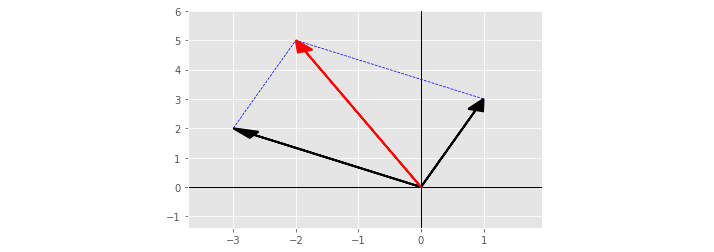

In [3]:
# This code cell will not be shown in the HTML version of this notebook
# import numpy, define two vectors, and add to see their sum visually
import numpy as np
vec1 = np.asarray([1,3])
vec2 = np.asarray([-3,2])
plotter = linlib.vector_plots.vector_add_plot(vec1,vec2)

##  Vector multiplication

### Multiplying a vector by a scalar

We can multiply any vector by a scalar by treating the multiplication elementwise.  For example if 

$$
\mathbf{x} = {\begin{bmatrix}
2.1  \\
-5.7 \\
13 \\
\end{bmatrix}}
$$

then for any scalar $c$

$$
c\times\mathbf{x} = {\begin{bmatrix}
c\times 2.1  \\
c\times-5.7 \\
c\times13 \\
\end{bmatrix}}
$$

And this is how scalar multiplication is done regardless of whether or not the vector is a row or column.

Using numpy we can use the standard multiplication operator to perform scalar-vector multiplication, as illustrated in the next cell.

In [11]:
# define vector
x = np.asarray([2.1,-5.7,13])

# multiply by a constant
c = 2
print (c*x)

[  4.2 -11.4  26. ]


This holds in general for a general $N\times 1$ vector $\mathbf{x}$ as well.

$$
c\times\mathbf{x} = {\begin{bmatrix}
c\times x_1 \\
c\times x_2\\
\vdots \\
c\times x_N \\
\end{bmatrix}}
$$

### The elementwise product

There are a number of ways to multiply two vectors - perhaps the most natural is the *elementwise product*.  This works precisely how it sounds: multiply two vectors of the same dimension element-by-element.  The former piece of this is important: just like addition, technically speaking we need both vectors to have the same dimension in order to make this work. 

To multiply two vectors element-wise

$$
\mathbf{x} = {\begin{bmatrix}
x_1 \\
x_2\\
\vdots \\
x_N \\
\end{bmatrix}} \,\,\,\,\,\,\,\,\,  \mathbf{y} = {\begin{bmatrix}
y_1 \\
y_2\\
\vdots \\
y_N \\
\end{bmatrix}}
$$

we then write 

$$
\mathbf{x} \times \mathbf{y} = {\begin{bmatrix}
x_1 \times y_1 \\
x_2 \times y_2\\
\vdots \\
x_N \times y_N \\
\end{bmatrix}}
$$

In numpy we use the natural multiplication operation '*' to perform elementwise multiplication between two vectors.

In [12]:
# define vector
x = np.asarray([2.1,-5.7,13])
x.shape = (3,1)
y = np.asarray([4.3, 9.2, 13])
y.shape = (3,1)
print (x*y)

[[   9.03]
 [ -52.44]
 [ 169.  ]]


### The inner product

The inner product is another way to multiply two vectors of the same dimension, and is the natural extension of multiplication of two scalar values in that this product produces a scalar output.  Here is how the inner product is defined: to take the inner product of two $N\times1$ vectors we first multiply them together entry-wise, then add up the result.

For two general vectors 

$$
\mathbf{x} = {\begin{bmatrix}
x_1 \\
x_2\\
\vdots \\
x_N \\
\end{bmatrix}} \,\,\,\,\,\,\,\,\,  \mathbf{y} = {\begin{bmatrix}
y_1 \\
y_2\\
\vdots \\
y_N \\
\end{bmatrix}}
$$

the inner product is written as $\mathbf{x}^T \mathbf{y}$ and is defined as

$$
\mathbf{x}^T \mathbf{y}= \text{sum}\left(\mathbf{x}\times \mathbf{y}\right)  =x_{1}y_{1}+x_{2}y_{2}+\cdots x_{N}y_{N} = \sum_{n=1}^Nx_ny_n
$$

The inner product is also often referred to as the 'dot' product, and written notationally as 

$$
\mathbf{x}\odot\mathbf{y}
$$

In the next cell we use numpy to take the inner product between two vectors.  Notice that we can write this out in at least two ways:

1.  By using the transpose notation given above: ``np.dot(x.T,y)``
2.  By using the element-wise product then sum notation: ``np.sum(x*y)``

In [13]:
# define two column vectors and compute the inner product
x = np.asarray([2.1,-5.7,13])
x.shape = (3,1)
y = np.asarray([4.3, 9.2, 13])
y.shape = (3,1)

# compute the inner product
print (np.dot(x.T,y)[0][0])
print(np.sum(x*y))

125.59
125.59


### The inner product and the norm (or geometric length) of a vector

The inner product (also commonly called the *correlation*) is also interesting because it helps define the geometric length of a vector.  Notice the result of multiplying a vector $\mathbf{x}$ by itself

$$
\mathbf{x}^T \mathbf{x}= \sum_{n=1}^Nx_nx_n = \sum_{n=1}^Nx_n^2
$$

We square each element and sum the result.  Visualizing a vector - as we do in the next Python cell for a two-dimensional example - we can square this formula with a common elementary formula for the vector's length.  In the left panel below we show the 'point' view of a two-dimensional vector, and in the right panel the corresponding 'arrow' version.  Visual guides - drawn in dashed blue - are shown in each panel.

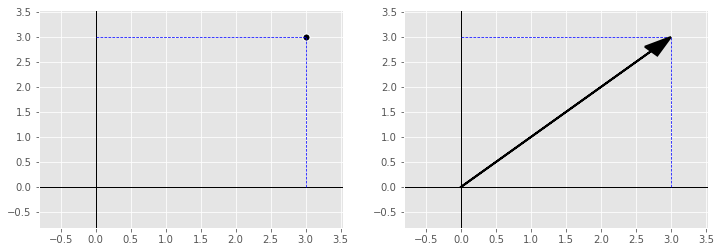

In [14]:
# This code cell will not be shown in the HTML version of this notebook
# import numpy, define a vectors
import numpy as np
vec1 = np.asarray([3,3])
plotter = linlib.vector_plots.single_plot(vec1,guides = True)

If we treated this vector - say as drawn in the right panel - as the hypotonus of a right triangle, how would we calculate its length?  Using the *Pythagorean theorem* we would square the length of each side - i.e., the length of each blue guide - sum the result, and take the square root of this.  Or - denoting our two-dimensional vector more generally as 

$$
\mathbf{x} = {\begin{bmatrix}
x_1 \\
x_2\\
\end{bmatrix}}
$$

then this computation becomes

$$
\text{length of hypotonus (a.k.a. length of vector)} = \sqrt{x_1^2 + x_2^2}
$$

In terms of the inner product we can write this length computation equivalently as 

$$
\sqrt{x_1^2 + x_2^2} = \sqrt{\mathbf{x}^T\mathbf{x}}
$$

Therefore we can express the length of a vector in terms of the inner product with itself - and this generalizes to vectors of any length.

Thus the notation denoting the length of a vector $\mathbf{x}$ being $\lVert \mathbf{x} \rVert _2$, we can always compute the length as

$$
\lVert \mathbf{x} \rVert _2 = \sqrt{\mathbf{x}^T\mathbf{x}}
$$

### The geometric interpretation of the inner product

The following beautiful formula - referred to as the *inner product rule* - holds for any two vectors $\mathbf{x}$ and $\mathbf{y}$  

$$
\mathbf{x}^T\mathbf{y} = \lVert \mathbf{x} \rVert_2 \lVert \mathbf{y} \rVert_2 \text{cos}(\theta)
$$

This rule - which can be formally proven using the *law of cosines* from trigonometry - is perhaps best intuited after a slight rearrangement of its terms, as follows.

$$
\left(\frac{\mathbf{x}}{ \lVert \mathbf{x} \rVert_2}\right)^T \left(\frac{\mathbf{y}}{ \lVert \mathbf{y} \rVert_2} \right)= \text{cos}(\theta)
$$

Here each input vector is normalized, i.e,. has length equal to one, and the formula can be interpreted as a smooth measurement of the angle $\theta$ between these two vectors lying on the unit circle. 

Notice that because cosine lies between $-1$ and $+1$ so too does this measurement.  When the two vectors point in the exact same direction the value takes on $+1$, when they point in completely opposite directions $-1$.  When the two vectors are *perpendicular* to each other, their inner product is equal to zero.  

The two extremes $\pm 1$ are easy to verify - for example if $\mathbf{x} = \mathbf{y}$ then the two vectors overlap completely, pointing in the same direction and

$$
\left(\frac{\mathbf{x}}{ \lVert \mathbf{x} \rVert_2}\right)^T \left(\frac{\mathbf{x}}{ \lVert \mathbf{x} \rVert_2} \right)=  \left(\frac{\mathbf{x}^T\mathbf{x}}{ \lVert \mathbf{x} \rVert_2^2} \right)=\left(\frac{\lVert \mathbf{x} \rVert_2^2}{ \lVert \mathbf{x} \rVert_2^2} \right) = +1
$$

In the next Python cell we animate the value of the inner product for two unit-length vectors using a slider widget.  The first $\mathbf{x}_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ is fixed, while the second is free to vary around the circle using the slider.  As the free vector rotates around the circle the corresponding inner product between it and the fixed vector is shown in the right panel.  Note how when the free vector is perpendicular to the fixed vector, the inner product is zero.  When they are pointed in completely opposite directions the inner product is $-1$, and when perfectly aligned $+1$. 

In [ ]:
# This code cell will not be shown in the HTML version of this notebook
# illustrate the full range of the inner product for against the vector [1,0]
start = 0.45  # where to start off on the unit circle
savepath = 'videos/animation_1.mp4'
linlib.transform_animators.inner_product_visualizer(savepath,num_frames = 200,start = start,fps=40)

In [3]:
## This code cell will not be shown in the HTML version of this notebook
# load video into notebook
from IPython.display import HTML
HTML("""
<video width="1000" height="400" controls loop>
  <source src="videos/animation_1.mp4" type="video/mp4">
  </video>
""")

### The  outer product

The **outer product** is another way to define multiplication between two vectors.  With two column vectors $\mathbf{x}$ and $\mathbf{y}$

$$
\mathbf{x}=\begin{bmatrix}
x_{1}\\
x_{2}\\
\vdots\\
x_{N}
\end{bmatrix},\,\,\,\,\,\,\,\mathbf{y}=\begin{bmatrix}
y_{1}\\
y_{2}\\
\vdots\\
y_{M}
\end{bmatrix}
$$

their *outer product* is written as $\mathbf{x}\mathbf{y}^T$ and is defined as

$\mathbf{x}\mathbf{y}^{T}=\begin{bmatrix}
x_{1}\\
x_{2}\\
\vdots\\
x_{N}
\end{bmatrix}\begin{bmatrix}
y_{1}\\
y_{2}\\
\vdots\\
y_{M}
\end{bmatrix}^{T}=\begin{bmatrix}
x_{1}y_{1} & x_{1}y_{2} & \cdots & x_{1}y_{M}\\
x_{2}y_{1} & x_{2}y_{2} & \cdots & x_{2}y_{M}\\
\vdots & \vdots & \ddots & \vdots\\
x_{N}y_{1} & x_{N}y_{2} & \cdots & x_{N}y_{M}
\end{bmatrix}$

This is an $N\times M$ *matrix* - which can be thought of as a collection of $M$ column vectors stacked side-by-side (or - likewise as a collection of $N$ row vectors stacked one on top of each other). We'll soon discuss matrices further.

In Python we can compute this outer product using the notation ``outer``.

In [16]:
# define vector
x = np.asarray([2.1,-5.7,13])
x.shape = (3,1)
y = np.asarray([4.3, 9.2])
y.shape = (2,1)
print (np.outer(x,y.T))

[[   9.03   19.32]
 [ -24.51  -52.44]
 [  55.9   119.6 ]]


## Linear combination of vectors

A linear combination is an operation that generalizes simple addition of two vectors by combining addition and scalar multiplication. Given two vectors $\mathbf{x}_{1}$ and $\mathbf{x}_{2}$ of the same dimension, their linear combination is formed by multiplying each with a scalar first and then adding up the result, as in    

$$\alpha_{1}\mathbf{x}_{1}+\alpha_{2}\mathbf{x}_{2}$$

where $\alpha_{1}$ and $\alpha_{2}$ are real numbers. Notice that for a given set of values for $\alpha_{1}$ and $\alpha_{2}$, the linear combination is a vector itself with the same dimension as $\mathbf{x}_{1}$ and $\mathbf{x}_{2}$. For instance with $\alpha_{1}=2$ and $\alpha_{2}=4$, the linear combination is given by

$$2\mathbf{x}_{1}+4\mathbf{x}_{2}$$

In the Python cell below we plot this linear combination for two-dimensional vectors $\mathbf{x}_{1} = [2, \, \, 1]$ and $\mathbf{x}_{2} = [-1, \, \, 2]$.

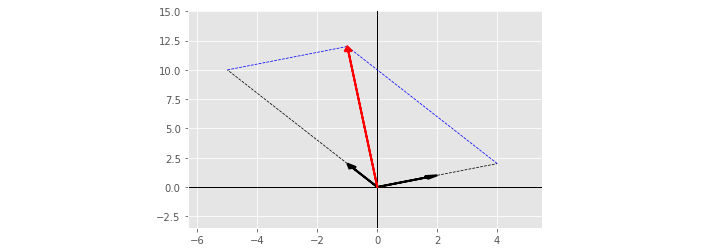

In [17]:
# This code cell will not be shown in the HTML version of this notebook
vec1 = np.asarray([2,1])
vec2 = np.asarray([-1,2])
alpha1 = 2
alpha2 = 5

plotter = linlib.vector_plots.vector_linear_combination_plot(vec1, vec2, alpha1, alpha2)

Let's try a different set of values for $\alpha_{1}$ and $\alpha_{2}$.

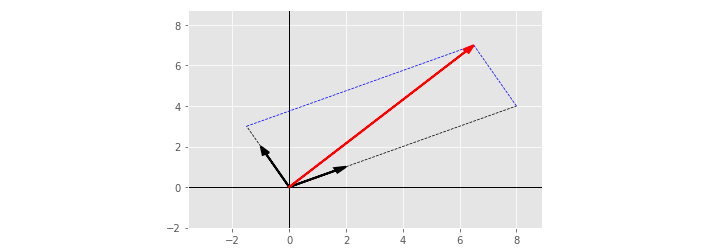

In [18]:
# This code cell will not be shown in the HTML version of this notebook
vec1 = np.asarray([2,1])
vec2 = np.asarray([-1,2])
alpha1 = 4
alpha2 = 1.5

plotter = linlib.vector_plots.vector_linear_combination_plot(vec1, vec2, alpha1, alpha2)

Indeed by changing the values of $\alpha_{1}$ and $\alpha_{2}$ in $\alpha_{1}\mathbf{x}_{1}+\alpha_{2}\mathbf{x}_{2}$ each time we get a new vector (or point) that is a linear combination of $\mathbf{x}_{1}$ and $\mathbf{x}_{2}$. 

In [ ]:
# This code cell will not be shown in the HTML version of this notebook
# animate a two-dimensional spanning set ranging over a coarse set of points in the space
C = np.array([[2,-1],[1,2]])
savepath='videos/animation_2.mp4'
linlib.span_animation.perfect_visualize(savepath,C=C,num_frames = 200,fps=10)

In [12]:
## This code cell will not be shown in the HTML version of this notebook
# load video into notebook
from IPython.display import HTML
HTML("""
<video width="1000" height="400" controls loop>
  <source src="videos/animation_2.mp4" type="video/mp4">
  </video>
""")

The set of all such vectors/points - created by taking a linear combination of vectors $\mathbf{x}_{1}$ and $\mathbf{x}_{2}$ - is referred to as the span of $\mathbf{x}_{1}$ and $\mathbf{x}_{2}$. In the example above the span of vectors $\mathbf{x}_{1}$ and $\mathbf{x}_{2}$ is the entire 2D plane, or put in different words, $\mathbf{x}_{1}$ and $\mathbf{x}_{2}$ span the 2D plane.

But isn't the span of two $1\times 2$ vectors always the entire 2D plane? Not necessarily! Take the two vectors $\mathbf{x}_{1} = [2, \, \, 1]$ and $\mathbf{x}_{2} = [4, \, \, 2]$ for example. Because these two vectors point at the same direction (one is a scalar multiple of the other), any linear combination of the two will have the same direction. Let's verify this by looking at a couple of examples.    

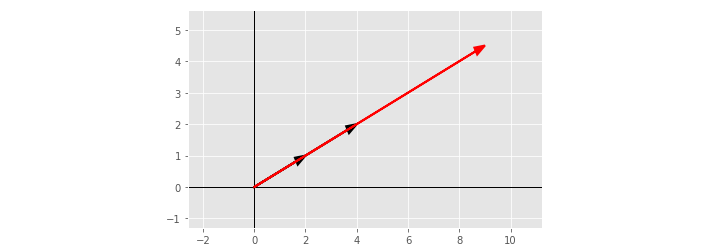

In [20]:
## This code cell will not be shown in the HTML version of this notebook
vec1 = np.asarray([2,1])
vec2 = np.asarray([4,2])
alpha1 = .5
alpha2 = 2

plotter = linlib.vector_plots.vector_linear_combination_plot(vec1, vec2, alpha1, alpha2)

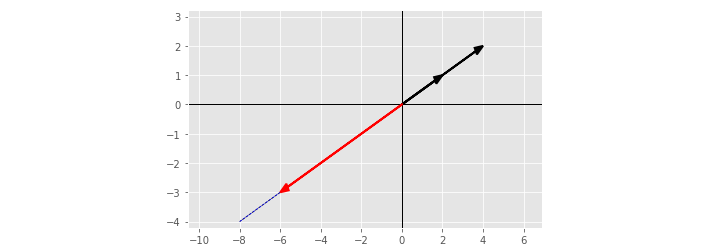

In [21]:
## This code cell will not be shown in the HTML version of this notebook
vec1 = np.asarray([2,1])
vec2 = np.asarray([4,2])
alpha1 = 1
alpha2 = -2

plotter = linlib.vector_plots.vector_linear_combination_plot(vec1, vec2, alpha1, alpha2)

So in this case the linear combination of $\mathbf{x}_{1} = [2, \, \, 1]$ and $\mathbf{x}_{2} = [4, \, \, 2]$ is just a line that can be traced out using scalar multiples of any of the two vectors. In other words, given either one of $\mathbf{x}_{1}$ or $\mathbf{x}_{2}$ the other one becomes redundant. In linear algebra jargon, such vectors are called linearly dependent. 

The notion of linear combination of vectors can be extended in general to a set of $k$ vectors $\left\{\mathbf{x}_{1}, \mathbf{x}_{2}, \ldots,\mathbf{x}_{k}\right\}$, all of the same dimension, taking the form

$$\sum_{i=1}^k \alpha_{i}\mathbf{x}_{i}=\alpha_{1}\mathbf{x}_{1}+\alpha_{2}\mathbf{x}_{2}+\cdots+\alpha_{k}\mathbf{x}_{k}$$

If these vectors span a k-dimensional space they are called linearly independent. Otherwise there is at least one vector in the set that can be written as a linear combination of the rest. 

#  Matrices and matrix operations

In this Section we introduce the concept of a matrix as well as the basic operations one can perform on a single matrix or pairs of matrices.  These completely mirror those of the vector, including the transpose operation, addition/subtraction, and several multiplication operations including the inner, outer, and element-wise products.  Because of the close similarity to vectors this Section is much more terse than the previous. 

##  Basic ideas

If we take a set of $P$ row vectors - each of dimension $1\times N$ 

$$\mathbf{x}_{1}=\left[\begin{array}{cccc}
x_{11} & x_{12} & \cdots & x_{1N}\end{array}\right]$$

$$\mathbf{x}_{2}=\left[\begin{array}{cccc}
x_{21} & x_{22} & \cdots & x_{2N}\end{array}\right]$$

$$\vdots$$

$$\mathbf{x}_{P}=\left[\begin{array}{cccc}
x_{P1} & x_{P2} & \cdots & x_{PN}\end{array}\right]$$

and stack them one-by-one on top of each other we form a *matrix* of dimension $P\times N$


$$
\mathbf{X}= \begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1N}\\
x_{21} & x_{22} & \cdots & x_{2N}\\
\vdots & \vdots & \ddots & \vdots\\
x_{P1} & x_{P2} & \cdots & x_{PN}
\end{bmatrix}
$$

In interpreting the dimension $P\times N$ the first number $P$ is the number of rows in the matrix, with the second number $N$ denoting the number of columns.

The notation we use to describe a matrix is a bold uppercase letter, as with $\mathbf{X}$ above.  Like the vector notation nothing about the dimensions of the matrix is detailed by its notation - we need to explicitly state these.

The *transpose* operation we originally saw for vectors is defined by extension for matrices.  When performed on a matrix the transpose operation flips the entire array around - every column is turned into a row, and then these rows are stacked one on top of the other forming a $N\times P$ matrix.  The same notation used previously for vectors - a superscript $T$ - is used to denote the transpose of a matrix

$$
\mathbf{X} ^T= \begin{bmatrix}
x_{11} & x_{21} & \cdots & x_{P1}\\
x_{12} & x_{22} & \cdots & x_{P2}\\
\vdots & \vdots & \ddots & \vdots\\
x_{1N} & x_{2N} & \cdots & x_{PN}
\end{bmatrix}
$$

In numpy we define matrices just as we do with arrays, and the same notation is used to transpose the matrix.  We illustrate this with an example in the next  Python cell.

In [22]:
# create a 2x3 matrix
X = np.array([[1,3,1],[2,5,1]])
print ('----- the matrix X -----')
print (X) 

# transpose the matrix
print ('----- the transpose matrix X^T -----')
print (X.T) 

----- the matrix X -----
[[1 3 1]
 [2 5 1]]
----- the transpose matrix X^T -----
[[1 2]
 [3 5]
 [1 1]]


##  Addition and subtraction of matrices

Addition and subtraction of matrices is performed element-wise, just as with vectors.  As with vectors two matrices must have the same dimensions in order to perform addition/subtraction on two matrices.  For example with two $P\times N$ matrices

$$
\mathbf{X}=\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1N}\\
x_{21} & x_{22} & \cdots & x_{2N}\\
\vdots & \vdots & \ddots & \vdots\\
x_{P1} & x_{P2} & \cdots & x_{PN}
\end{bmatrix} \,\,\,\,\,\,\,\,\,  \mathbf{Y}=\begin{bmatrix}
y_{11} & y_{12} & \cdots & y_{1N}\\
y_{21} & y_{22} & \cdots & y_{2N}\\
\vdots & \vdots & \ddots & \vdots\\
y_{P1} & y_{P2} & \cdots & y_{PN}
\end{bmatrix}
$$

their element-wise sum is

$$
\mathbf{X}+\mathbf{Y}=\begin{bmatrix}
x_{11}+y_{11} & x_{12}+y_{12} & \cdots & x_{1N}+y_{1N}\\
x_{21}+y_{21} & x_{22}+y_{22} & \cdots & x_{2N}+y_{2N}\\
\vdots & \vdots & \ddots & \vdots\\
x_{P1}+y_{P1} & x_{P2}+y_{P2} & \cdots & x_{PN}+y_{PN}
\end{bmatrix}
$$

Addition / subtraction of matrices using numpy is very done precisely as with vectors - with numpy both are referred to as *arrays*.

In [23]:
# create two matrices
X = np.array([[1,3,1],[2,5,1]])
Y = np.array([[5,9,14],[1,2,1]])
print ('----- the matrix X -----')
print (X) 
print ('----- the matrix Y -----')
print (Y)

# add  matrices
print ('----- the matrix X + Y -----')
print (X + Y)

----- the matrix X -----
[[1 3 1]
 [2 5 1]]
----- the matrix Y -----
[[ 5  9 14]
 [ 1  2  1]]
----- the matrix X + Y -----
[[ 6 12 15]
 [ 3  7  2]]


## Multplication

### Multiplication by a scalar

As with vectors we can multiply a matrix by a scalar - and this operation is performed element-by-element.  For any scalar value $c$ we write scalar multiplication as 

$$
c\times\mathbf{X}=\begin{bmatrix}
c\times x_{11} & c\times x_{12} & \cdots & c\times x_{1N}\\
c\times x_{21} & c\times x_{22} & \cdots & c\times x_{2N}\\
\vdots & \vdots & \ddots & \vdots\\
c\times x_{P1} & c\times x_{P2} & \cdots & c\times x_{PN}
\end{bmatrix}
$$

In numpy scalar multiplication can be written very naturally using the '*' symbol, as illustrated in the next Python cell.

In [24]:
# define a matrix
X = np.array([[1,3,1],[2,5,1]])
c = 2
print (c*X)

[[ 2  6  2]
 [ 4 10  2]]


### Multiplication of a matrix by a vector

Generally speaking there are two ways to multiply an $P\times N$ matrix $\mathbf{X}$ by a vector $\mathbf{a}$.  The first - referred to as *left multiplication* - involves multiplication by $1\times P$ row vector $\mathbf{a}$.  This operation is written $\mathbf{a}\mathbf{X} = \mathbf{b}$, with $\mathbf{b}$ being a $1\times N$ dimensional vector.  It is defined by taking the inner product of $\mathbf{a}$ with each column of $\mathbf{X}$.

$$
\mathbf{a}\mathbf{X} = \mathbf{b} = 
\begin{bmatrix}
\sum_{p=1}^P a_px_{p1} \,\,\,\,\,
\sum_{p=1}^P a_px_{p2} \,\,\,\,\, 
\cdots \,\,\,\,\,
\sum_{p=1}^P a_px_{pN} 
\end{bmatrix}
$$

Since this multiplication consists of a sequence of inner products, we can use the inner or dot product notation in numpy to compute a left multiplication as illustrated in the next cell.

In [25]:
# define a matrix
X = np.array([[1,3,1],[2,5,1]])
a = np.array([1,1])
a.shape = (1,2)

# compute a left multiplication
print (np.dot(a,X))

[[3 8 2]]


Right multiplication is defined by multiplying $\mathbf{X}$ on the right by a $N\times 1$ vector $\mathbf{a}$.  Right multiplication is written as $\mathbf{X}\mathbf{a} = \mathbf{b}$ and $\mathbf{b}$ will be a $P\times 1$ vector.  The right product is defined as 

$$
\mathbf{X}\mathbf{a} = \mathbf{b} = 
\begin{bmatrix}
\sum_{n=1}^N a_nx_{1n} \\
\sum_{n=1}^N a_nx_{2n} \\ 
\vdots \\
\sum_{n=1}^N a_nx_{Pn} 
\end{bmatrix}
$$

Since the right multiplication also consists of a sequence of inner products, we can use the inner or dot product notation in numpy to compute a right multiplication as illustrated in the next cell.

In [26]:
# define a matrix
X = np.array([[1,3,1],[2,5,1]])
a = np.array([1,1,1])
a.shape = (3,1)

# compute a right multiplication
print (np.dot(X,a))

[[5]
 [8]]


### Element-wise multiplication of two matrices

As with vectors, we can define element-wise multiplication on two matrices of the same size.  Multiplying two $P\times N$ matrices $\mathbf{x}$ and $\mathbf{y}$ together gives

$$
\mathbf{X}\times \mathbf{Y}=\begin{bmatrix}
x_{11}\times y_{11} & x_{12}\times y_{12} & \cdots & x_{1N}+y_{1N}\\
x_{21}\times y_{21} & x_{22}\times y_{22} & \cdots & x_{2N}+y_{2N}\\
\vdots & \vdots & \ddots & \vdots\\
x_{P1}\times y_{P1} & x_{P2}\times y_{P2} & \cdots & x_{PN}+y_{PN}
\end{bmatrix}
$$

This can be easily computed in numpy, as illustrated in the next Python cell for two small example matrices.

In [27]:
# create two matrices
X = np.array([[1,3,1],[2,5,1]])
Y = np.array([[5,9,14],[1,2,1]])
print ('----- the matrix X -----')
print (X) 
print ('----- the matrix Y -----')
print (Y)

# add  matrices
print ('----- the matrix X * Y -----')
print (X*Y)

----- the matrix X -----
[[1 3 1]
 [2 5 1]]
----- the matrix Y -----
[[ 5  9 14]
 [ 1  2  1]]
----- the matrix X * Y -----
[[ 5 27 14]
 [ 2 10  1]]


### General multiplication of two matrices

The regular product (or simply product) of two matrices $\mathbf{X}$ and $\mathbf{Y}$ can be defined based on the vector outer product operation, provided that the number of columns in $\mathbf{X}$ matches the number of rows in $\mathbf{Y}$. That is, we must have $\mathbf{X}$ and $\mathbf{Y}$ of sizes $P\times N$ and $N \times Q$ respectively, for the matrix product to be defined as 

$$\mathbf{XY}= \sum_{n=1}^N \mathbf{x}_{n}\mathbf{y}_{n}^{T}$$

where $\mathbf{x}_{n}$ is the $n^{th}$ column of $\mathbf{X}$, and $\mathbf{y}_{n}^{T}$ is the transpose of the $n^{th}$ column of $\mathbf{Y}^{T}$ (or equivalently, the $n^{th}$ row of $\mathbf{Y}$). Note that each summand above is an outer-product matrix of size $P \times Q$, and so too is the final matrix $\mathbf{XY}$.

Matrix multplication can also be defined entry-wise, using vector inner-products, where the entry in the $p^{th}$ row and $q^{th}$ column of $\mathbf{XY}$ can be found as the inner-product of (transpose of) the $p^{th}$ row in $\mathbf{X}$ and the $q^{th}$ column in $\mathbf{Y}$.

$$\left(\mathbf{XY}\right)_{p,q}= \mathbf{x}_{p}^{T}\mathbf{y}_{q}$$

In [28]:
# create two matrices
X = np.array([[1,3,1],[2,5,1]])
Y = np.array([[5,9,14],[1,2,1]])
Y = np.array([[5,1],[9,2],[14,1]])
print ('----- the matrix X -----')
print (X) 
print ('----- the matrix Y -----')
print (Y)

# add  matrices
print ('----- the matrix XY -----')
print (np.dot(X,Y))

----- the matrix X -----
[[1 3 1]
 [2 5 1]]
----- the matrix Y -----
[[ 5  1]
 [ 9  2]
 [14  1]]
----- the matrix XY -----
[[46  8]
 [69 13]]
